In [1]:
import pandas as pd
import numpy as np
#import pymc3 as pm
import math

from datetime import timedelta

#from dask.distributed import Client, LocalCluster

import matplotlib.pyplot as plt

In [2]:
#cluster = LocalCluster()
#client = Client(cluster)

In [3]:
def plot_group_scatter_separate(y,x,M):
    
    # Get number of rows and columns to plot
    if M<=3:
        num_cols = M
    else:
        num_cols = 3
    num_rows = math.ceil(M/3)

    # Set up plot
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(20,10), sharex=True, sharey=True)
    ax = np.ravel(ax)

    # Plot each group
    j, k = 0, N
    for i in range(M):
        ax[i].scatter(x[j:k], y[j:k])
        ax[i].set_title(f"Group {i+1}", fontsize=15)
        j += N
        k += N

    # Set common x and y axis
    fig.text(0.5, 0.07, 'Price', ha='center', fontsize=20)
    fig.text(0.09, 0.5, 'Sales', va='center', rotation='vertical', fontsize=20)
    
def scatter_y_by_groups(df,var_y,var_x,var_grp):
    
    mymodel = np.poly1d(np.polyfit(df[var_x], df[var_y], 3))
    myline = np.linspace(df[var_x].min(), df[var_x].max(), 100)

    df[var_grp] = df[var_grp].astype("category").cat.codes
    
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.scatter(df[var_x], df[var_y], c=df[var_grp])
    
    ax.set_xlabel('Price', fontsize=20)
    ax.set_ylabel('Sales', fontsize=20)
    
    plt.plot(myline, mymodel(myline))
    
    plt.show()

## Simulated: Bayesian Hierarchical Linear Regression

Source: Bayesian Analysis with Python 2nd Ed., pp. 111-116

In [4]:
# Set parameters of group observations (N observations in M groups)
N = 20
M = 6

idx = np.repeat(range(M-1), N)
idx = np.append(idx, M-1)

np.random.seed(1234)

In [5]:
# Set real parameters of linear model  
alpha_real = np.random.normal(70, 0.5, size = M)
beta_real = np.random.normal(-6, 2, size = M)
eps_real = np.random.normal(0, 3, size = len(idx))

In [10]:
# Simulate variables for each group m
x = np.random.normal(5, 1, size = len(idx))
y = alpha_real[idx] + beta_real[idx] * x + eps_real

In [11]:
# Save to dataset
df = pd.DataFrame({'Sales':y, 'Price':x, 'Store':idx})
df.to_csv('../data/dataset_1.csv',index=False)

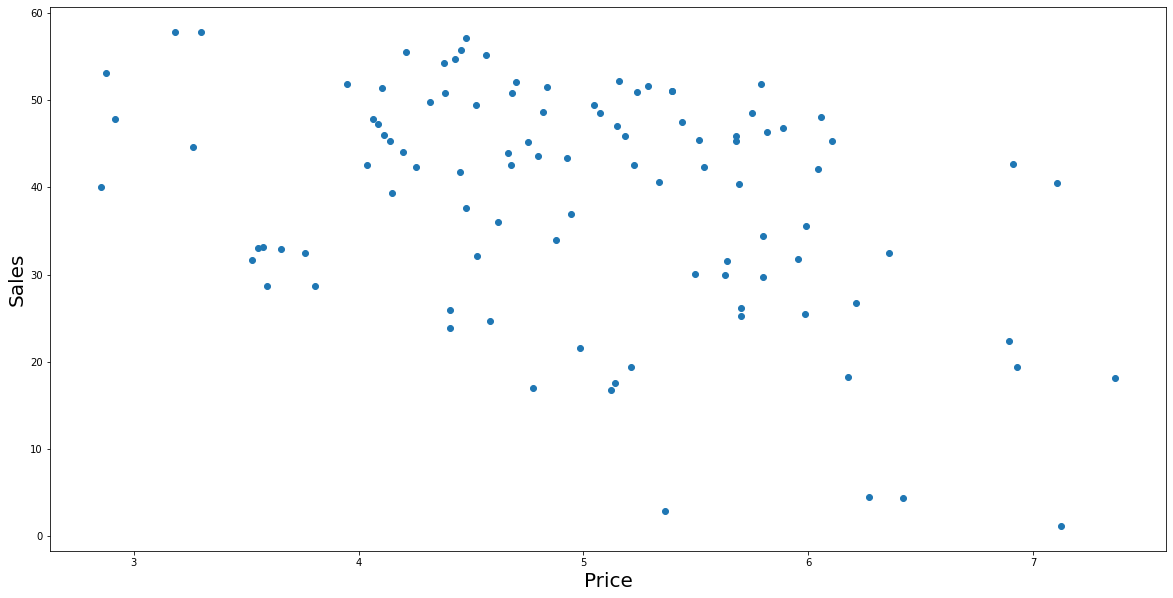

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(df['Price'], df['Sales'])
plt.xlabel('Price', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.show()

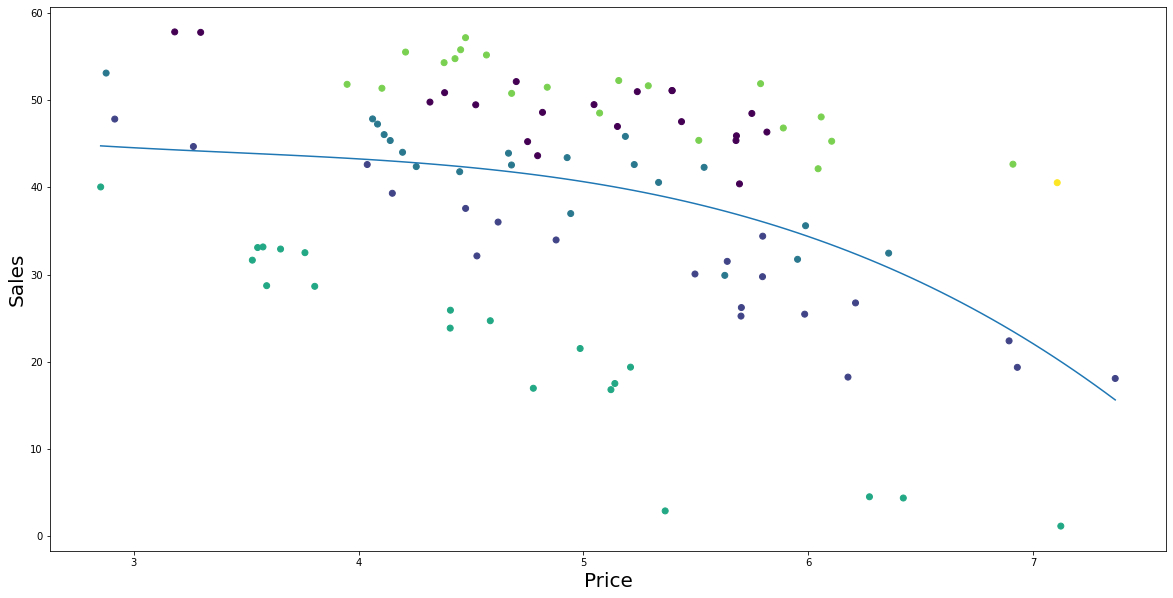

In [13]:
scatter_y_by_groups(df,'Sales','Price','Store')

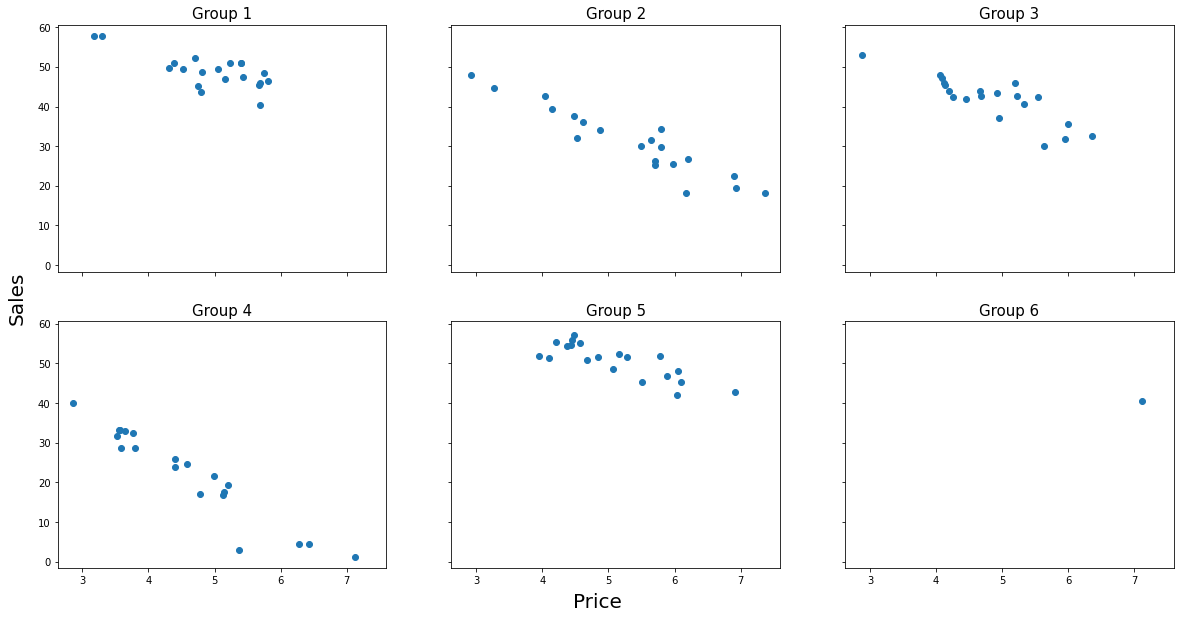

In [14]:
# Plot results
plot_group_scatter_separate(y,x,M)

# Real-World: Walmart data

Data source: https://www.kaggle.com/c/m5-forecasting-accuracy/data

In [6]:
df_sell_prices = pd.read_csv('../data/wallmart_data/sell_prices.csv')
df_sales_train = pd.read_csv('../data/wallmart_data/sales_train_evaluation.csv')
df_calendar = pd.read_csv('../data/wallmart_data/calendar.csv')

In [7]:
df_sales_train.dept_id.unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [8]:
df_calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [9]:
df_sell_prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [10]:
# Seet filter
#query_filter = 'item_id=="FOODS_3_823"'
query_filter = 'dept_id=="HOBBIES_2"'

In [11]:
# Load and transform dataset
df_sales_train_long = (
    pd.wide_to_long(df_sales_train
                    .query(query_filter), 'd_', i=['id','item_id','dept_id','cat_id','store_id','state_id'], j="day")
    .reset_index()
    .rename(columns={'d_':'sales'})
    .assign(
        start_date = pd.to_datetime('2011-01-28'),
        date = lambda d: d['start_date'] + pd.to_timedelta(d['day'],unit='days')
    )
    .drop(['day','start_date'],axis=1)
)

# Display
df_sales_train_long

,id,item_id,dept_id,cat_id,store_id,state_id,sales,date
0,HOBBIES_2_001_CA_1_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_1,CA,1,2011-01-29
1,HOBBIES_2_001_CA_1_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_1,CA,0,2011-01-30
2,HOBBIES_2_001_CA_1_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_1,CA,0,2011-01-31
3,HOBBIES_2_001_CA_1_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_1,CA,0,2011-02-01
4,HOBBIES_2_001_CA_1_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_1,CA,0,2011-02-02
...,...,...,...,...,...,...,...,...
2892085,HOBBIES_2_149_WI_3_evaluation,HOBBIES_2_149,HOBBIES_2,HOBBIES,WI_3,WI,0,2016-05-18
2892086,HOBBIES_2_149_WI_3_evaluation,HOBBIES_2_149,HOBBIES_2,HOBBIES,WI_3,WI,0,2016-05-19
2892087,HOBBIES_2_149_WI_3_evaluation,HOBBIES_2_149,HOBBIES_2,HOBBIES,WI_3,WI,0,2016-05-20
2892088,HOBBIES_2_149_WI_3_evaluation,HOBBIES_2_149,HOBBIES_2,HOBBIES,WI_3,WI,0,2016-05-21


In [12]:
# Prepare sell prices
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_sales_train_long_w_dates = (
    df_sales_train_long.merge(df_calendar,on='date')
    #.loc[:,['store_id','item_id','wm_yr_wk','date','sell_price']]
)

# Display
df_sales_train_long_w_dates

,id,item_id,dept_id,cat_id,store_id,state_id,sales,date,wm_yr_wk,weekday,...,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_2_001_CA_1_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_1,CA,1,2011-01-29,11101,Saturday,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,HOBBIES_2_002_CA_1_evaluation,HOBBIES_2_002,HOBBIES_2,HOBBIES,CA_1,CA,4,2011-01-29,11101,Saturday,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2,HOBBIES_2_003_CA_1_evaluation,HOBBIES_2_003,HOBBIES_2,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
3,HOBBIES_2_004_CA_1_evaluation,HOBBIES_2_004,HOBBIES_2,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
4,HOBBIES_2_005_CA_1_evaluation,HOBBIES_2_005,HOBBIES_2,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892085,HOBBIES_2_145_WI_3_evaluation,HOBBIES_2_145,HOBBIES_2,HOBBIES,WI_3,WI,0,2016-05-22,11617,Sunday,...,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0
2892086,HOBBIES_2_146_WI_3_evaluation,HOBBIES_2_146,HOBBIES_2,HOBBIES,WI_3,WI,0,2016-05-22,11617,Sunday,...,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0
2892087,HOBBIES_2_147_WI_3_evaluation,HOBBIES_2_147,HOBBIES_2,HOBBIES,WI_3,WI,0,2016-05-22,11617,Sunday,...,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0
2892088,HOBBIES_2_148_WI_3_evaluation,HOBBIES_2_148,HOBBIES_2,HOBBIES,WI_3,WI,0,2016-05-22,11617,Sunday,...,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0


In [13]:
df = (
    df_sales_train_long_w_dates[['item_id','store_id','dept_id','cat_id','state_id','wm_yr_wk','sales']]
    .groupby(['item_id','store_id','dept_id','cat_id','state_id','wm_yr_wk'])
    .sum()
    .reset_index()
    .merge(df_sell_prices,on=['item_id','store_id','wm_yr_wk'],how='inner')
)

In [14]:
df

,item_id,store_id,dept_id,cat_id,state_id,wm_yr_wk,sales,sell_price
0,HOBBIES_2_001,CA_1,HOBBIES_2,HOBBIES,CA,11101,2,5.47
1,HOBBIES_2_001,CA_1,HOBBIES_2,HOBBIES,CA,11102,0,5.47
2,HOBBIES_2_001,CA_1,HOBBIES_2,HOBBIES,CA,11103,0,5.47
3,HOBBIES_2_001,CA_1,HOBBIES_2,HOBBIES,CA,11104,3,5.47
4,HOBBIES_2_001,CA_1,HOBBIES_2,HOBBIES,CA,11105,1,5.47
...,...,...,...,...,...,...,...,...
317603,HOBBIES_2_149,WI_3,HOBBIES_2,HOBBIES,WI,11613,1,0.97
317604,HOBBIES_2_149,WI_3,HOBBIES_2,HOBBIES,WI,11614,3,0.97
317605,HOBBIES_2_149,WI_3,HOBBIES_2,HOBBIES,WI,11615,2,0.97
317606,HOBBIES_2_149,WI_3,HOBBIES_2,HOBBIES,WI,11616,3,0.97


In [15]:
df_agg = (
    df.groupby(['wm_yr_wk','state_id','store_id'])
    .agg({'sell_price':'mean','sales':'sum'})
    .reset_index()
)

#df_agg.plot.scatter(x='sell_price',y='sales')

In [16]:
df_agg['state_id'] = df_agg.state_id.astype("category").cat.codes

In [25]:
df_agg.to_csv('../data/dataset_walmart.csv')

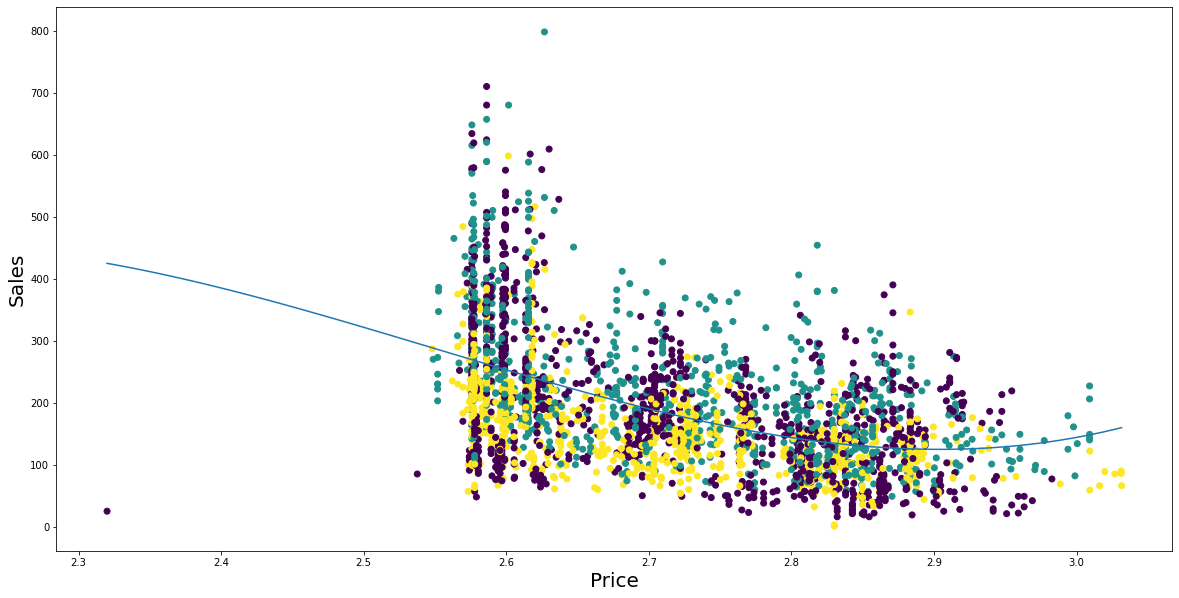

In [18]:
scatter_y_by_groups(df_agg,'sales','sell_price','state_id')

In [19]:
df_agg_state_id_0 = df_agg.query('state_id==0')
df_agg_state_id_1 = df_agg.query('state_id==1')
df_agg_state_id_2 = df_agg.query('state_id==2')

<ipython-input-3-a5807defb0d4>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var_grp] = df[var_grp].astype("category").cat.codes


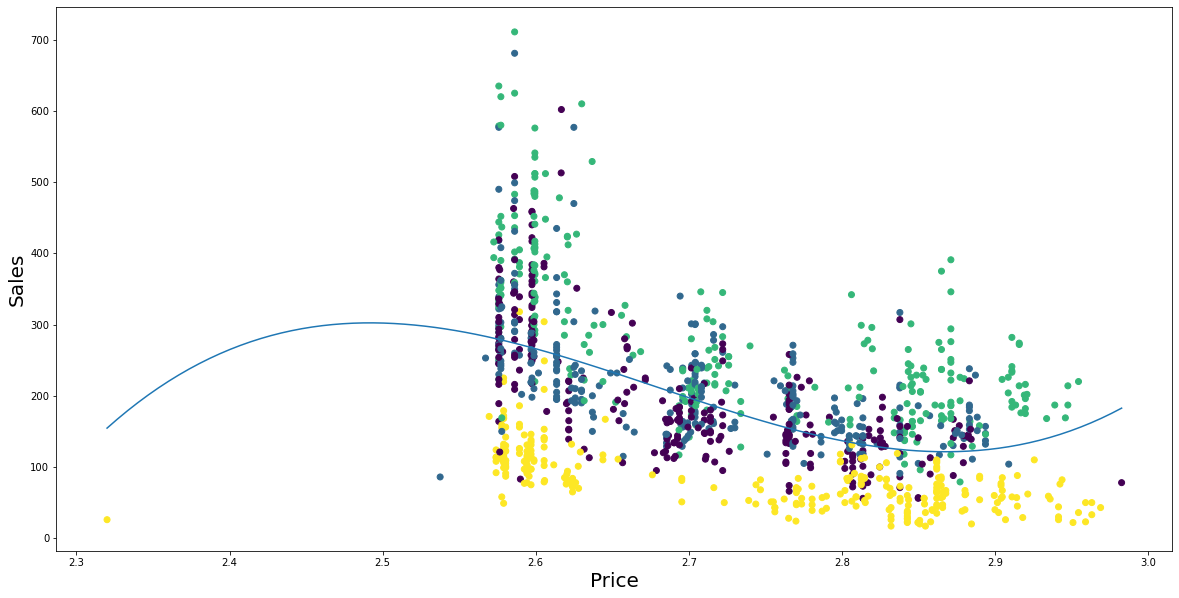

In [20]:
scatter_y_by_groups(df_agg_state_id_0,'sales','sell_price','store_id')

<ipython-input-3-a5807defb0d4>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var_grp] = df[var_grp].astype("category").cat.codes


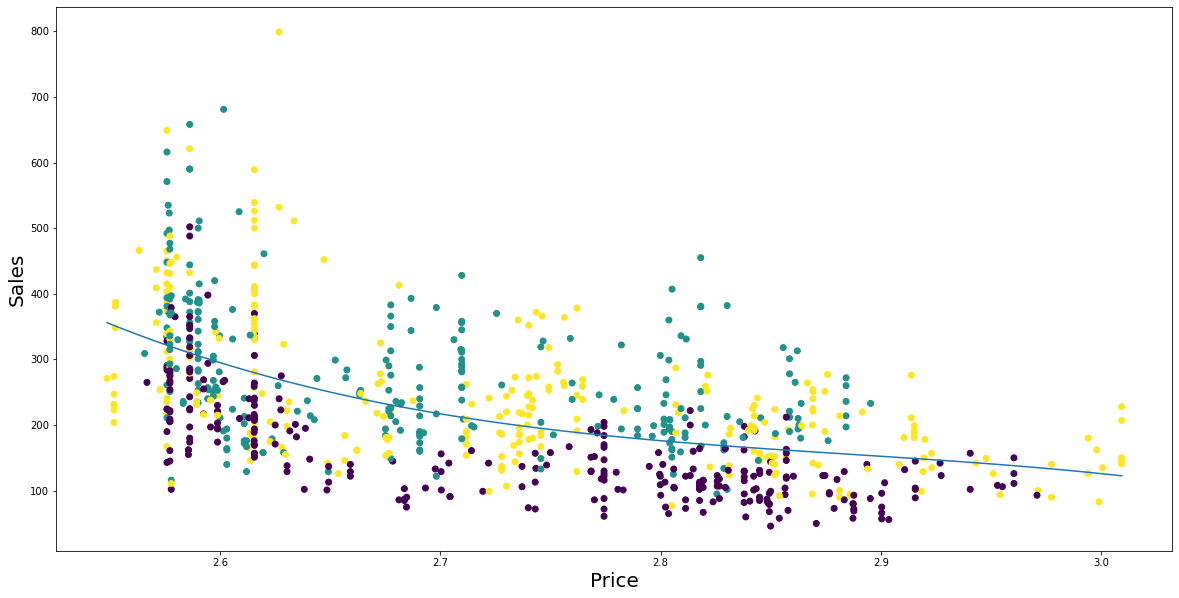

In [21]:
scatter_y_by_groups(df_agg_state_id_1,'sales','sell_price','store_id')

In [22]:
df_final_export = df_agg_state_id_2[~((df_agg_state_id_2.sales<420) & (df_agg_state_id_2.sell_price<2.58))]

In [23]:
df_final_export

,wm_yr_wk,state_id,store_id,sell_price,sales
7,11101,2,WI_1,2.864400,55
8,11101,2,WI_2,2.707857,67
9,11101,2,WI_3,2.633103,82
17,11102,2,WI_1,2.826500,73
18,11102,2,WI_2,3.026889,86
...,...,...,...,...,...
2487,11540,2,WI_1,2.586242,235
2489,11540,2,WI_3,2.586242,233
2499,11541,2,WI_3,2.586242,234
2509,11542,2,WI_3,2.586242,239


In [ ]:
df_final_export.to_csv('../data/wallmart.csv')

Index(['wm_yr_wk', 'state_id', 'sell_price', 'sales'], dtype='object')
state_id


<ipython-input-43-4ad51610d2bd>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var_grp] = df[var_grp].astype("category").cat.codes


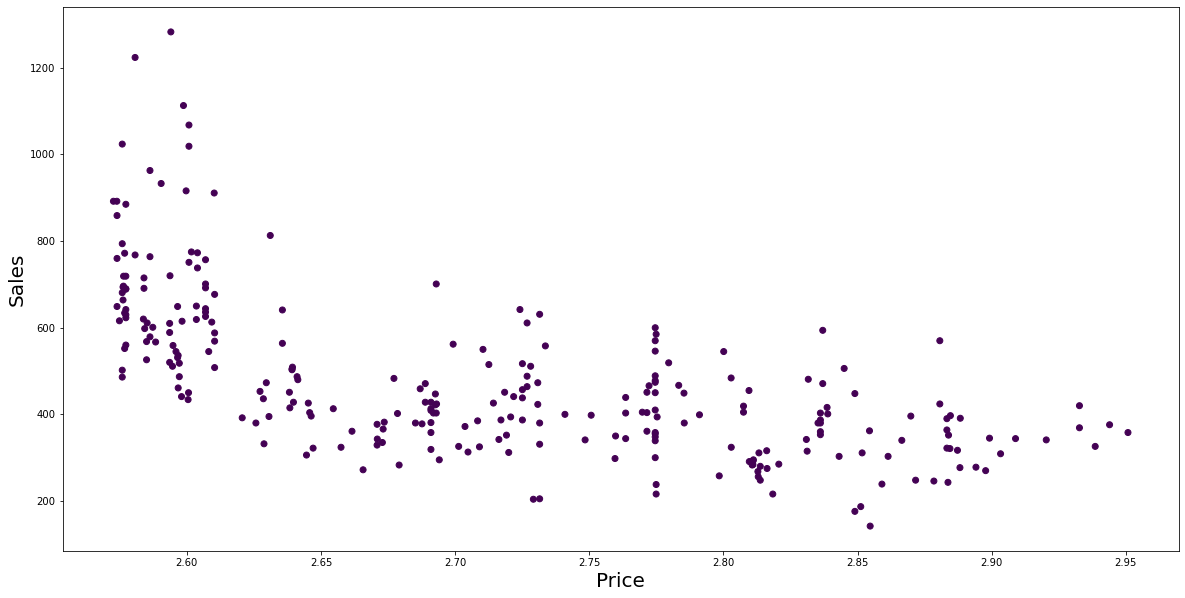

In [86]:
scatter_y_by_groups(df_final_export,'sales','sell_price','state_id')